# Data Preprocessing Tools

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
# from sklearn.decomposition import PCA
from transformers import BertTokenizer, BertModel, AutoTokenizer, AutoModel
import torch 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.phrases import Phrases, Phraser
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Importing the dataset

In [2]:
dataset = pd.read_csv('potential-talents - Aspiring human resources - seeking human resources.csv')
X = dataset.iloc[:, :-1]

In [3]:
print(X.shape)
print(X.dtypes)

(104, 4)
id             int64
job_title     object
location      object
connection    object
dtype: object


## Histograming

<Axes: title={'center': 'Connections'}, ylabel='Frequency'>

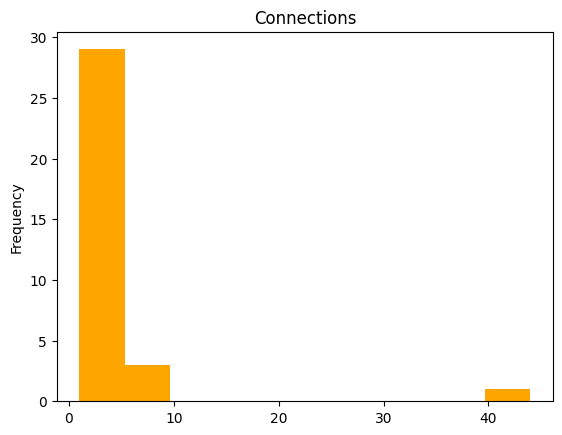

In [4]:
X['connection'].value_counts().plot(kind='hist',color="orange", title= 'Connections')

<Axes: title={'center': 'Location'}, ylabel='Frequency'>

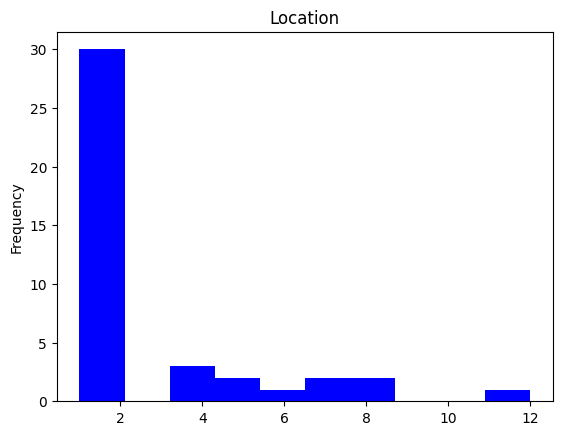

In [5]:
X['location'].value_counts().plot(kind='hist',color="blue", title= 'Location')

<Axes: title={'center': 'Job_Title'}, xlabel='related sentences', ylabel='Frequency'>

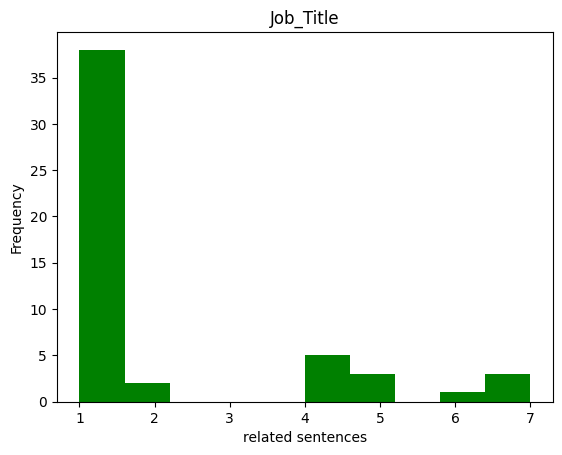

In [6]:
X['job_title'].value_counts().plot(kind='hist', color="green", xlabel= 'related sentences', title= 'Job_Title')

## Encoding categorical data

### Converting connection Column into Integer

In [7]:
X['connection']= X['connection'].str.rstrip('+ ')
X['connection'] = X['connection'].astype('Int64')
print(X['connection'].describe)

<bound method NDFrame.describe of 0       85
1      500
2       44
3      500
4      500
      ... 
99     103
100    500
101     49
102    500
103    500
Name: connection, Length: 104, dtype: Int64>


In [8]:
X['embedding_Score'] = 0
X['similarity_BERT'] = 0

In [9]:
print(X, X.describe)

      id                                          job_title   
0      1  2019 C.T. Bauer College of Business Graduate (...  \
1      2  Native English Teacher at EPIK (English Progra...   
2      3              Aspiring Human Resources Professional   
3      4             People Development Coordinator at Ryan   
4      5    Advisory Board Member at Celal Bayar University   
..   ...                                                ...   
99   100  Aspiring Human Resources Manager | Graduating ...   
100  101              Human Resources Generalist at Loparex   
101  102   Business Intelligence and Analytics at Travelers   
102  103                     Always set them up for Success   
103  104   Director Of Administration at Excellence Logging   

                                location  connection  embedding_Score   
0                         Houston, Texas          85                0  \
1                                 Kanada         500                0   
2    Raleigh-Durham, Nor

### Tokenization and Word Embedding

## Using BERT

In [10]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Encode the sentences
embeddings = model.encode(X['job_title']).tolist()

In [11]:
embeding_score = []

for e in range(0, len(embeddings)-1):
    embeding_score.append(embeddings)
    X['embedding_Score'] = embeding_score[e]

print(X['embedding_Score'])

0      [-0.8347964882850647, 0.7061930298805237, 1.41...
1      [-1.104153037071228, 0.6818210482597351, 0.480...
2      [0.4692794978618622, 0.2829475402832031, 2.330...
3      [-0.6027137041091919, -0.19602404534816742, 1....
4      [-0.05547791346907616, -0.19447150826454163, 1...
                             ...                        
99     [-0.5095097422599792, 0.2794761657714844, 1.60...
100    [0.27189913392066956, 0.062046267092227936, 1....
101    [-0.5368144512176514, 0.6071473360061646, 1.69...
102    [0.12111365050077438, -0.07036973536014557, 2....
103    [-0.9533588886260986, 0.9029402136802673, 1.01...
Name: embedding_Score, Length: 104, dtype: object


In [12]:

X['sentence1'] = "aspiring human resources"
X['sentence2'] = "seeking human resources"
embeddings1 = model.encode(X['sentence1']).tolist()
embeddings2 = model.encode(X['sentence2']).tolist()
# print(len(embeddings1))

In [13]:
embeding_score1 = []
embeding_score2 = []

for j in range(0, len(X['sentence1'])-1):
    embeding_score1.append(embeddings1)
    X['embedding_Score1'] = embeding_score1[j]

for em in range(0, len(X['sentence2'])-1):
    embeding_score2.append(embeddings2)
    X['embedding_Score2'] = embeding_score2[em]


print(X)

      id                                          job_title   
0      1  2019 C.T. Bauer College of Business Graduate (...  \
1      2  Native English Teacher at EPIK (English Progra...   
2      3              Aspiring Human Resources Professional   
3      4             People Development Coordinator at Ryan   
4      5    Advisory Board Member at Celal Bayar University   
..   ...                                                ...   
99   100  Aspiring Human Resources Manager | Graduating ...   
100  101              Human Resources Generalist at Loparex   
101  102   Business Intelligence and Analytics at Travelers   
102  103                     Always set them up for Success   
103  104   Director Of Administration at Excellence Logging   

                                location  connection   
0                         Houston, Texas          85  \
1                                 Kanada         500   
2    Raleigh-Durham, North Carolina Area          44   
3                  

## Calculating Cosine Similarity for BERT

In [14]:
cosine_similarities = []

for i in range (len(X['embedding_Score'])): 
    similarity = cosine_similarity([X['embedding_Score1'][i]],[X['embedding_Score'][i]])[0][0]
    cosine_similarities.append(similarity)
    X['similarity_BERT'][i] = cosine_similarities[i]

/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_4683/3040175249.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['similarity_BERT'][i] = cosine_similarities[i]


In [15]:
print(X['similarity_BERT'])

0      0.497849
1      0.372279
2      0.927214
3      0.705831
4      0.463202
         ...   
99     0.500861
100    0.609300
101    0.455116
102    0.618959
103    0.488341
Name: similarity_BERT, Length: 104, dtype: float64


In [16]:
X['similarity2_BERT'] = 0
cosine_similarities2 = []

for i in range (len(X['embedding_Score'])): 
    similarity2 = cosine_similarity([X['embedding_Score2'][i]],[X['embedding_Score'][i]])[0][0]
    cosine_similarities2.append(similarity2)
    X['similarity2_BERT'][i] = cosine_similarities2[i]

/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_4683/3124447512.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['similarity2_BERT'][i] = cosine_similarities2[i]


In [17]:
print(X['similarity2_BERT'])

0      0.220571
1      0.324733
2      0.709421
3      0.668772
4      0.468543
         ...   
99     0.241682
100    0.650529
101    0.436132
102    0.488246
103    0.410908
Name: similarity2_BERT, Length: 104, dtype: float64


## Using Word2Vec

In [18]:
X['preprocessed_sentences'] = X['job_title'].apply(lambda x: simple_preprocess(x))

X['preprocessed_sentences1'] = X['sentence1'].apply(lambda x: simple_preprocess(x))

X['preprocessed_sentences2'] = X['sentence2'].apply(lambda x: simple_preprocess(x))
    

### Encoding Job_title

In [19]:
# Create a list of preprocessed sentences
sentences = X['preprocessed_sentences'].tolist()

# Create bigrams/trigrams to improve word2vec performance
phrases = Phrases(sentences, min_count=5, threshold=10)
bigram = Phraser(phrases)
sentences = list(bigram[sentences])

print(sentences)

# Train the word2vec model
word2vec_model = Word2Vec(sentences, workers=4)

X['embedding_Score_wv'] = 0

# Calculate word2vec embeddings for each sentence
X['embedding_Score_wv'] = sentences
X['embedding_Score_wv'] = X['embedding_Score_wv'].apply(lambda x: [word2vec_model.wv[word] for word in x if word in word2vec_model.wv])

print(X['embedding_Score_wv'])

[['bauer', 'college', 'of', 'business_graduate', 'magna_cum', 'laude', 'and', 'aspiring', 'human', 'resources', 'professional'], ['native', 'english', 'teacher', 'at', 'epik', 'english', 'program', 'in', 'korea'], ['aspiring', 'human', 'resources', 'professional'], ['people_development', 'coordinator', 'at', 'ryan'], ['advisory', 'board', 'member', 'at', 'celal', 'bayar', 'university'], ['aspiring', 'human', 'resources', 'specialist'], ['student', 'at', 'humber', 'college', 'and', 'aspiring', 'human', 'resources', 'generalist'], ['hr', 'senior', 'specialist'], ['student', 'at', 'humber', 'college', 'and', 'aspiring', 'human', 'resources', 'generalist'], ['seeking', 'human', 'resources', 'hris', 'and', 'generalist', 'positions'], ['student', 'at', 'chapman', 'university'], ['svp', 'chro', 'marketing', 'communications', 'csr', 'officer', 'engie', 'houston', 'the', 'woodlands', 'energy', 'gphr', 'sphr'], ['human', 'resources', 'coordinator', 'at', 'buckhead', 'atlanta'], ['bauer', 'colleg

In [20]:
# Create a list of preprocessed sentences
sentences1 = X['preprocessed_sentences1'].tolist()
sentences2 = X['preprocessed_sentences2'].tolist()

# Create bigrams/trigrams to improve word2vec performance
phrases1 = Phrases(sentences1, min_count=5, threshold=10)
bigram1 = Phraser(phrases1)
sentences1 = list(bigram1[sentences1])

phrases2 = Phrases(sentences2, min_count=5, threshold=10)
bigram2 = Phraser(phrases2)
sentences2 = list(bigram2[sentences2])

# Train the word2vec model
word2vec_model1 = Word2Vec(sentences1,  workers=4)
word2vec_model2 = Word2Vec(sentences2,  workers=4)

X['embedding_Score_wv1'] = 0
X['embedding_Score_wv2'] = 0

# Calculate word2vec embeddings for each sentence
X['embedding_Score_wv1'] = sentences1
X['embedding_Score_wv1'] = X['embedding_Score_wv1'].apply(lambda y: [word2vec_model1.wv[word] for word in y if word in word2vec_model1.wv])

X['embedding_Score_wv2'] = sentences2
X['embedding_Score_wv2'] = X['embedding_Score_wv2'].apply(lambda z: [word2vec_model2.wv[word] for word in z if word in word2vec_model2.wv])

## Calculating Cosine Similarity for Word2Vec

In [21]:
X['similarity_WV'] = 0
cosine_similarities_wv = []

for i in range(len(X)): 
    try:
        similarity_wv = cosine_similarity(np.mean(X['embedding_Score_wv'][i] ,axis=0).reshape(1,-1)
                                      ,np.mean(X['embedding_Score_wv1'][i] ,axis=0).reshape(1,-1))
        cosine_similarities_wv.append(similarity_wv[0][0])
    except: 
        cosine_similarities_wv.append(0)
    X['similarity_WV'][i] = cosine_similarities_wv[i]

/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_4683/841991121.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['similarity_WV'][i] = cosine_similarities_wv[i]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.fram

In [22]:
print(X['similarity_WV'])

0      0.540846
1      0.302231
2      0.550846
3      0.170910
4      0.339880
         ...   
99     0.631050
100    0.873759
101    0.424262
102    0.000000
103    0.439020
Name: similarity_WV, Length: 104, dtype: float64


In [23]:
X['similarity2_WV'] = 0
cosine_similarities2_wv = []

for i in range(len(X)): 
    try:
        similarity2_wv = cosine_similarity(np.mean(X['embedding_Score_wv'][i] ,axis=0).reshape(1,-1)
                                      ,np.mean(X['embedding_Score_wv2'][i] ,axis=0).reshape(1,-1))
        cosine_similarities2_wv.append(similarity2_wv[0][0])
    except: 
        cosine_similarities2_wv.append(0)   
    X['similarity2_WV'][i] = cosine_similarities2_wv[i]

/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_4683/270442960.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['similarity2_WV'][i] = cosine_similarities2_wv[i]
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.fr

In [24]:
print(X['similarity2_WV'])

0      0.540846
1      0.302231
2      0.550846
3      0.170910
4      0.339880
         ...   
99     0.631050
100    0.873759
101    0.424262
102    0.000000
103    0.439020
Name: similarity2_WV, Length: 104, dtype: float64


In [25]:
# print(X['similarity_WV'].dtype)
np.array(X['similarity_BERT']).reshape(1,-1)

array([[0.49784945, 0.37227934, 0.92721362, 0.70583111, 0.46320153,
        0.94260958, 0.72150865, 0.68061264, 0.72150865, 0.76440683,
        0.44876225, 0.29949869, 0.39719848, 0.49784945, 0.49784945,
        0.37227934, 0.92721362, 0.70583111, 0.49784945, 0.37227934,
        0.92721362, 0.70583111, 0.46320153, 0.94260958, 0.72150864,
        0.68061264, 0.6710071 , 0.83371311, 0.67100709, 0.83371311,
        0.4978494 , 0.37227934, 0.92721357, 0.70583111, 0.46320153,
        0.94260958, 0.72150864, 0.68061264, 0.72150864, 0.76440683,
        0.44876225, 0.29949869, 0.39719848, 0.49784945, 0.37227934,
        0.92721362, 0.70583111, 0.46320153, 0.94260958, 0.72150864,
        0.68061264, 0.72150864, 0.76440683, 0.44876225, 0.29949869,
        0.39719848, 0.49784945, 0.92721362, 0.70583111, 0.94260958,
        0.68061264, 0.76440683, 0.44876223, 0.29949869, 0.39719848,
        0.70073827, 0.751283  , 0.69538513, 0.44915771, 0.4233802 ,
        0.54158013, 0.65605041, 0.74027174, 0.78

In [26]:
print(X)

      id                                          job_title   
0      1  2019 C.T. Bauer College of Business Graduate (...  \
1      2  Native English Teacher at EPIK (English Progra...   
2      3              Aspiring Human Resources Professional   
3      4             People Development Coordinator at Ryan   
4      5    Advisory Board Member at Celal Bayar University   
..   ...                                                ...   
99   100  Aspiring Human Resources Manager | Graduating ...   
100  101              Human Resources Generalist at Loparex   
101  102   Business Intelligence and Analytics at Travelers   
102  103                     Always set them up for Success   
103  104   Director Of Administration at Excellence Logging   

                                location  connection   
0                         Houston, Texas          85  \
1                                 Kanada         500   
2    Raleigh-Durham, North Carolina Area          44   
3                  

### MinMaxScaler for Similarity

In [27]:
X['scaled_values_WV'] = (X['similarity_WV'] + 1) / 2

print(X['scaled_values_WV'])

0      0.770423
1      0.651115
2      0.775423
3      0.585455
4      0.669940
         ...   
99     0.815525
100    0.936879
101    0.712131
102    0.500000
103    0.719510
Name: scaled_values_WV, Length: 104, dtype: float64


### MinMaxScaler for Connection

In [35]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Perform min-max scaling
data_scale = np.array(X['connection'])
X['Connection_Score'] = scaler.fit(data_scale.reshape(-1, 1))

# Scale the data
X['Connection_Score'] = scaler.transform(data_scale.reshape(-1, 1))

print(X['Connection_Score'])

0      0.168337
1      1.000000
2      0.086172
3      1.000000
4      1.000000
         ...   
99     0.204409
100    1.000000
101    0.096192
102    1.000000
103    1.000000
Name: Connection_Score, Length: 104, dtype: float64


### Creating 3 additinal Columns to calculate the higher Scores for Connections and Cosine Similarties

In [39]:
X['Similarity_Score_WV']= X['scaled_values_WV'] * 0.8

print(X['Similarity_Score_WV'])

X['Connection_Score_Sim']= X['Connection_Score'] * 0.2

print(X['Connection_Score_Sim'])

0      0.616338
1      0.520892
2      0.620338
3      0.468364
4      0.535952
         ...   
99     0.652420
100    0.749503
101    0.569705
102    0.400000
103    0.575608
Name: Similarity_Score_WV, Length: 104, dtype: float64
0      0.033667
1      0.200000
2      0.017234
3      0.200000
4      0.200000
         ...   
99     0.040882
100    0.200000
101    0.019238
102    0.200000
103    0.200000
Name: Connection_Score_Sim, Length: 104, dtype: float64


In [40]:
X['RANK'] =  X['Connection_Score_Sim'] + X['Similarity_Score_WV']

print(X['RANK'])

0      0.650006
1      0.720892
2      0.637573
3      0.668364
4      0.735952
         ...   
99     0.693302
100    0.949503
101    0.588943
102    0.600000
103    0.775608
Name: RANK, Length: 104, dtype: float64


In [41]:
print(X)

      id                                          job_title   
0      1  2019 C.T. Bauer College of Business Graduate (...  \
1      2  Native English Teacher at EPIK (English Progra...   
2      3              Aspiring Human Resources Professional   
3      4             People Development Coordinator at Ryan   
4      5    Advisory Board Member at Celal Bayar University   
..   ...                                                ...   
99   100  Aspiring Human Resources Manager | Graduating ...   
100  101              Human Resources Generalist at Loparex   
101  102   Business Intelligence and Analytics at Travelers   
102  103                     Always set them up for Success   
103  104   Director Of Administration at Excellence Logging   

                                location  connection   
0                         Houston, Texas          85  \
1                                 Kanada         500   
2    Raleigh-Durham, North Carolina Area          44   
3                  

## Sorting based on Rank column

In [46]:
# Sort DataFrame based on the 'age' column
sorted_df = X.sort_values('RANK', ascending = False)

# Print the sorted DataFrame
print(sorted_df.head(20))

      id                                          job_title   
67    68            Human Resources Specialist at Luxottica  \
100  101              Human Resources Generalist at Loparex   
77    78             Human Resources Generalist at Schwan's   
70    71    Human Resources Generalist at ScottMadden, Inc.   
64    65  Human Resources Coordinator at InterContinenta...   
42    43  Human Resources Coordinator at InterContinenta...   
55    56  Human Resources Coordinator at InterContinenta...   
12    13  Human Resources Coordinator at InterContinenta...   
88    89                    Director Human Resources  at EY   
80    81  Senior Human Resources Business Partner at Hei...   
68    69  Director of Human Resources North America, Gro...   
74    75  Nortia Staffing is seeking Human Resources, Pa...   
39    40  Seeking Human Resources HRIS and Generalist Po...   
61    62  Seeking Human Resources HRIS and Generalist Po...   
52    53  Seeking Human Resources HRIS and Generalist P

## Splitting the dataset into the Training set and Test set

In [ ]:
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
lr = LinearRegression()
